In [1]:
#initilization
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import dataclasses as dataclass
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import quad
import math


In [2]:
#DEFINIOTION OF CLASSES
#A class is defined for reactants telling about the stoichometry and the concentration (jeg kan ik stave og magter ik kommentere på min 
#klamme lorte kode. den plankes senere)
class Reactant :
  def __init__(self, name, coef, conc, order, end_conc, number):
    self.name = name
    self.coef = coef
    self.conc = conc
    self.order = order
    self.end_conc = end_conc
    self.number = number
reactant = [Reactant("Reactant A",1,0.8,2, 'X',1),
           Reactant("Reactant B",2,0.6,1, 'X',2),
           Reactant("Reactant C",6,0.88,0,'X',3)]

#A class is defined for the products telling about the stoich
class Product :
  def __init__(self, name, coef, conc, end_conc):
    self.name = name
    self.coef = coef
    self.conc = conc
    self.end_conc = end_conc
product = [Product("Product D",1,0,'X'), 
           Product("Product E",2,0,'X')]    



#A class for the reaction is defined containing the reaction rate constant, the conversion and the tank volume.
class Reactor :
  def __init__(self, k, X, V):
    self.k = k
    self.X = X
    self.V = V
    
#the reaction parameters are defined. 
reactor = Reactor(1.2,0.8,8)





In [3]:

# FINDING OF LIMITTING REACTANT !!!!!
#Now the limitted reactant is found by finding the lowest amount of substance by multiplying the concentration of
#of each substance with the tank volume


#Now the stoich number to the limited amount is found in order to rearrange the reaction.
Amount = [];
for r in reactant:
    amount = r.conc/r.coef*reactor.V
    Amount.append(amount)
    Limit_amount = min(Amount)
    if Limit_amount == r.conc/r.coef*reactor.V:
        #the reaction coefficient to the limitted reactant is defined
        limit_coef = r.coef 
        #and the amount of the limitted reactant is found
        limit_amount = r.conc * reactor.V
        limit_concentration = r.conc
        reactant_number = r.number

  
    

In [4]:
#CALCULATION OF END CONCENTRATION FOR REACTANTS AND PRODUCTS !!!!

for r in reactant:
    r.end_conc = r.conc-r.coef/limit_coef*limit_concentration*reactor.X

for p in product:
    p.end_conc = p.conc+p.coef/limit_coef*limit_concentration*reactor.X
  
    
    
#The end concentration of each reactant is printed 
for r in reactant: 
    print('The concentration of ' +str(r.name) + ' is ' + str(r.end_conc))
    
for p in product: 
    print('The concentration of ' +str(p.name) + ' is ' + str(p.end_conc))




The concentration of Reactant A is 0.6826666666666668
The concentration of Reactant B is 0.3653333333333333
The concentration of Reactant C is 0.17599999999999993
The concentration of Product D is 0.11733333333333335
The concentration of Product E is 0.2346666666666667


In [5]:
# FINDING THE REACTION TIME !!!!!!!!
#Now the reaction kinetics are looked into in order to plot the concentration profile.
def integrand(X):
    rate = 1
    for r in reactant:
        concentration =  r.conc - r.coef/limit_coef * limit_concentration * X
        rate_per_reactant = concentration**r.order
        rate = rate * rate_per_reactant 
            
    return (limit_concentration)/((reactor.k*rate))
t_reaction, err = quad(integrand, 0, reactor.X)
print('The reaction time is ' + str(t_reaction))
    
    
    
 

The reaction time is 2.3009257119965665


In [6]:
#NOW THE CONCENTRATION PROFILE IS FOUND FOR THE REACTANTS!!!!!!
#initial concetration for reactants

order = [];
init_conc_reactants = [];
for r in reactant:
    Order = r.order
    Init = r.conc
    order.append(Order)
    init_conc_reactants.append(Init)


def model(conc, reaction_time):
    rate = 1;
    for c in range(len(init_conc_reactants)):
        each = conc[c-1]**order[c-1]
        rate = rate * each
    dCdt = [];
    for r in reactant:
        ddCdt = -reactor.k * rate * r.coef /limit_coef 
        dCdt.append(ddCdt)
    return dCdt

reaction_time = np.linspace(0,t_reaction,num=600)
    
sol_reactants = odeint(model, init_conc_reactants, reaction_time)


In [28]:
#PRODUCTS !!!!!!!
sol = sol_reactants[:,(reactant_number-1)]
prod_conc = [];
for p in product:
    prod_conc.append(p.conc + p.coef/limit_coef *(limit_concentration-sol))
    


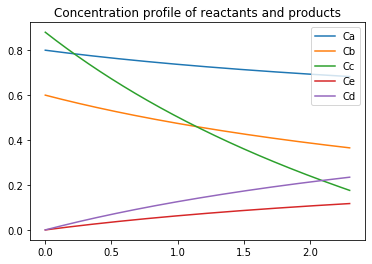

In [31]:
#FIGURES!!!!!!!!!


fig = plt.figure()
ax = plt.subplot(111)
ax.plot(reaction_time,sol_reactants[:,0], label = 'Ca')
ax.plot(reaction_time,sol_reactants[:,1], label = 'Cb')
ax.plot(reaction_time,sol_reactants[:,2], label = 'Cc')
ax.plot(reaction_time,prod_conc[0], label = 'Ce')
ax.plot(reaction_time,prod_conc[1], label = 'Cd')
plt.title('Concentration profile of reactants and products')
ax.legend()
plt.show()  

In [30]:
prod_conc

[array([0.        , 0.00029476, 0.00058901, 0.00088275, 0.00117599,
        0.00146873, 0.00176097, 0.00205271, 0.00234395, 0.00263469,
        0.00292494, 0.0032147 , 0.00350396, 0.00379273, 0.00408101,
        0.0043688 , 0.0046561 , 0.00494292, 0.00522925, 0.0055151 ,
        0.00580047, 0.00608535, 0.00636976, 0.00665369, 0.00693714,
        0.00722011, 0.00750261, 0.00778464, 0.00806619, 0.00834727,
        0.00862789, 0.00890803, 0.00918771, 0.00946692, 0.00974567,
        0.01002395, 0.01030177, 0.01057913, 0.01085603, 0.01113247,
        0.01140846, 0.01168398, 0.01195905, 0.01223367, 0.01250784,
        0.01278155, 0.01305481, 0.01332763, 0.01359999, 0.01387191,
        0.01414339, 0.01441442, 0.014685  , 0.01495514, 0.01522484,
        0.01549411, 0.01576293, 0.01603131, 0.01629926, 0.01656677,
        0.01683385, 0.0171005 , 0.01736671, 0.01763249, 0.01789784,
        0.01816276, 0.01842726, 0.01869132, 0.01895497, 0.01921818,
        0.01948098, 0.01974335, 0.0200053 , 0.02

In [17]:
#PRODUCTS !!!!!!!
init_conc_prod = [];
for p in product:
    Init = p.conc
    init_conc_prod.append(Init)

consumed = np.zeros(len(reaction_time))
for s in range(len(reaction_time)):
    consumed[s-1]=limit_concentration-sol_reactants[((s-1),(reactant_number-1))]
    
    
prod_ratio = [];
for p in product:
    prods=p.coef/limit_coef 
    prod_ratio.append(prods)

prod_conc = np.zeros((len(reaction_time),len(init_conc_prod)))
for i in range(len(prod_ratio)):
    ratio = prod_ratio[i-1]
    prod_conc[:,(i)] = ratio * consumed
      

The concentration of Product D is 0.11733333333333335
The concentration of Product E is 0.2346666666666667


In [18]:
limit_concentration

0.88

In [19]:
sol_reactants[1,2]

0.8782314594688629